In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import librosa
import numpy as np
from numpy import asarray
from numpy import save
import os
import random
import time
from matplotlib import pyplot as plt

In [ ]:
# def extract_features(file_name):
#     print(file_name)
#     audio, sample_rate = librosa.load(file_name, duration=2.97)
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#     mfccsscaled = np.mean(mfccs.T, axis=0)
#     return mfccsscaled

In [ ]:
# base = '/content/drive/MyDrive/THESIS/Libirispeech_dataset_for_others/'

In [ ]:
# dataset = np.zeros(40, dtype=int)
# id = np.zeros(1,dtype=int)

In [ ]:
# first_iteration = True
# file_count = 1
# for dirpath, dirnames, files in os.walk(base):

#   if file_count <= 2:
#     new_speaker = True

#     if first_iteration:
#         first_iteration = False
#         continue

#     speaker_id = ''

#     for file in files:
#         if new_speaker:
#             new_speaker = False
#             speaker_id = file.split('-')[0]

#         dataset = np.vstack([dataset, extract_features(os.path.join(*[base, speaker_id, file]))])
#         id = np.vstack([id, speaker_id])

#     file_count += 1


# ## Removing the 1st row from anchor, positive samples' feature vectors because of zero value
# dataset = np.delete(dataset, 0, axis=0)
# id = np.delete(id, 0, axis=0)

In [ ]:
# dataset.shape

In [ ]:
# id.shape

In [ ]:
# dataset_save = asarray(dataset)
# save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/others/dataset.npy', dataset_save)

# id_save = asarray(id)
# save('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/others/ide.npy', id_save)

# **Start From Here**

In [ ]:
from numpy import load

anchor = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/train/anchor.npy')
positive = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/train/positive.npy')
speaker_id = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/train/speaker_id.npy')

support = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/support_set_5.npy')
support_id = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/support_set_speaker_id_5.npy')

query = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/query_set_5.npy')
query_id = load('/content/drive/MyDrive/Colab Notebooks/thesis_code_main/feature_extracted_saved_arrays/test/query_set_speaker_id_5.npy')

In [ ]:
dataset = np.append(anchor, positive, axis=0)
dataset = np.append(dataset,support, axis=0)

print(dataset.shape)

(67355, 40)


In [ ]:
id = np.append(speaker_id, speaker_id, axis=0)
id = np.append(id, support_id, axis=0)

print(id.shape)

(67355, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset, id, test_size=0.25, random_state=143)

# X_test=np.append(X_test, query, axis=0)
# Y_test = np.append(Y_test, query_id, axis=0)

# X_train = dataset
# Y_train = id
# X_test = query
# Y_test = query_id

# print(X_test)

#**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3)

model = knn.fit(X_train, Y_train)

print("Test accuracy {:.2f}".format(knn.score(X_test, Y_test)))

Y_predict = model.predict(X_test)

end_time = time.time()

print("Time of execution: ", (end_time - start_time))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Test accuracy 0.71
Time of execution:  29.731053113937378


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict, average='macro')
# print(classification_report(Y_test , Y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7476648315436054, 0.6830915617472951, 0.6863416271753392, None)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix( Y_test ,Y_predict)
print(matrix)
from seaborn import heatmap
heatmap(matrix , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)


#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

rf = RandomForestClassifier(n_estimators=1)

model = rf.fit(X_train, np.ravel(Y_train))

print("Test accuracy without scaling: {:.2f}".format(rf.score(X_test, Y_test)))
Y_predict = model.predict(X_test)

end_time = time.time()

print("Time of execution: ", (end_time - start_time))

Test accuracy without scaling: 0.29
Time of execution:  10.794681549072266


In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(query_id , Y_predict))

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.26726004347142535, 0.26097423351930976, 0.25468508524374067, None)

# **MLP classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()

neural_network = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10)

model = neural_network.fit(X_train, np.ravel(Y_train))

print("Test accuracy: {:.2f}".format(neural_network.score(X_test, Y_test)))

end_time = time.time()
print("Time of execution: ", (end_time - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test accuracy: 0.28
Time of execution:  38.056756258010864


In [ ]:
Y_predict = model.predict(X_test)
# from sklearn.metrics import classification_report

# print(classification_report(query_id , Y_predict))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_predict, average='macro')

In [ ]:
# TP = 0
# TN = 0
# FP = 0
# FN = 0

In [ ]:
# # for i in range(len(Y_test)):
#     if Y_test[i] == y_predict[i]:
#         if y_predict[i] == 1580:
#             TP= TP + 1
#         else:
#             TN = TN + 1
#     else:
#         if y_predict[i] == 1284:
#             FN = FN + 1
#         else:
#             FP = FP + 1

In [ ]:
# recall = TP/(TP + FN)
# print(recall)

In [ ]:
# precision_1580 = TP/(TP+FP)
# precision_1284 = TN/(TN+FN)
# print(precision_1580)
# print(precision_1284)

In [ ]:
# F1 = (2 * TP) / (2 * TP + FP + FN)
# print(F1)

In [ ]:
# print(TP)
# print(TN)
# print(FP)

# print(FN)

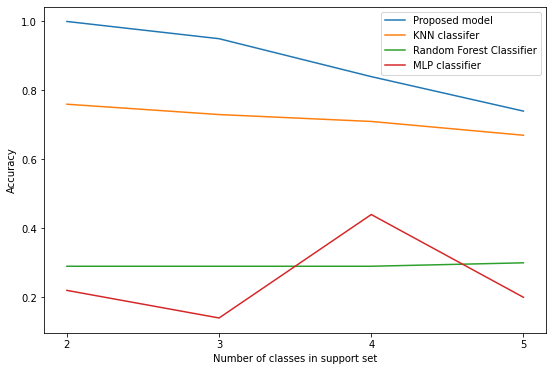

In [ ]:
x = ['2', '3', '4', '5']
y = [1.0,0.95,0.84,0.74]
knn = [0.76,0.73,0.71,0.67]
rf = [0.29,0.29,0.29,0.3]
mlp = [0.22, 0.14, 0.44, 0.2]
plt.plot(x,y, label='Proposed model')
plt.plot(x,knn, label='KNN classifer')
plt.plot(x,rf, label='Random Forest Classifier')
plt.plot(x,mlp, label='MLP classifier')
plt.xlabel('Number of classes in support set')
plt.ylabel('Accuracy')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(9, 6)
# fig.savefig('test2png.png', dpi=100)
plt.show()